In [2]:
# Import necessary libraries
import os
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
import kagglehub

# Download the dataset using kagglehub
dataset_path = kagglehub.dataset_download("zeyadkhalid/faceshape-processed")
print("Path to dataset files:", dataset_path)

# The dataset folder is inside a subdirectory called 'dataset'
base_dir = os.path.join(dataset_path, 'dataset')

# Check that the base_dir exists
if not os.path.isdir(base_dir):
    raise FileNotFoundError(f"The expected dataset folder {base_dir} does not exist.")

print("Using dataset folder:", base_dir)

# List the subdirectories in base_dir
subdirs = os.listdir(base_dir)
print("Subdirectories in base_dir:", subdirs)


C:\Users\alira\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\alira\.cache\kagglehub\datasets\zeyadkhalid\faceshape-processed\versions\1
Using dataset folder: C:\Users\alira\.cache\kagglehub\datasets\zeyadkhalid\faceshape-processed\versions\1\dataset
Subdirectories in base_dir: ['test', 'train']


In [32]:

# Prepare a list to collect file paths and labels
data = []

# Iterate over the subdirectories (e.g., 'train' and 'test')
for split in subdirs:
    split_dir = os.path.join(base_dir, split)
    if not os.path.isdir(split_dir):
        print(f"Warning: {split_dir} is not a directory. Skipping.")
        continue
    # List class folders within each split directory
    class_folders = [os.path.join(split_dir, folder) for folder in os.listdir(split_dir)
                     if os.path.isdir(os.path.join(split_dir, folder))]
    print(f"Found class folders in '{split}':", [os.path.basename(cf) for cf in class_folders])
    
    # Iterate over each class folder
    for class_folder in class_folders:
        label = os.path.basename(class_folder)  # Use folder name as label (e.g., 'Heart')
        # Get all image file paths; adjust pattern if needed for your image types
        image_files = glob.glob(os.path.join(class_folder, '*.*'))
        print(f"Found {len(image_files)} files in '{label}' folder under '{split}'.")
        for img_path in image_files:
            data.append({'filepath': img_path, 'label': label, 'original_split': split})

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Check that the DataFrame contains the 'label' column and print key information
if 'label' in df.columns and not df.empty:
    print("Total samples in the dataset:", len(df))
    print("Class distribution:")
    print(df['label'].value_counts())
else:
    raise KeyError("The 'label' column is missing from the DataFrame or no data was found.")

# Split the dataset into train (70%), validation (20%), and test (10%)
# First, split out the test set (10% of the data)
train_val_df, test_df = train_test_split(
    df,
    test_size=0.10,
    stratify=df['label'],
    random_state=42
)

# From the remaining 90%, allocate 20% of the overall data to validation.
# That is approximately 22.22% of train_val_df.
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.2222,  # ~20% of overall data
    stratify=train_val_df['label'],
    random_state=42
)

# Display the number of samples for each split
print("\nTrain samples:", len(train_df))
print("Validation samples:", len(val_df))
print("Test samples:", len(test_df))

# Save the splits to CSV for further processing (optional)
train_df.to_csv("train_data.csv", index=False)
val_df.to_csv("val_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)


Found class folders in 'test': ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
Found 200 files in 'Heart' folder under 'test'.
Found 200 files in 'Oblong' folder under 'test'.
Found 199 files in 'Oval' folder under 'test'.
Found 199 files in 'Round' folder under 'test'.
Found 200 files in 'Square' folder under 'test'.
Found class folders in 'train': ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
Found 798 files in 'Heart' folder under 'train'.
Found 798 files in 'Oblong' folder under 'train'.
Found 797 files in 'Oval' folder under 'train'.
Found 789 files in 'Round' folder under 'train'.
Found 799 files in 'Square' folder under 'train'.
Total samples in the dataset: 4979
Class distribution:
label
Square    999
Heart     998
Oblong    998
Oval      996
Round     988
Name: count, dtype: int64

Train samples: 3485
Validation samples: 996
Test samples: 498


In [33]:
train_df

,filepath,label,original_split
3461,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Round,train
3700,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Round,train
4368,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Square,train
10,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Heart,test
2931,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Oval,train
...,...,...,...
4649,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Square,train
4000,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Round,train
3260,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Oval,train
3481,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Round,train


In [34]:
val_df

,filepath,label,original_split
589,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Oval,test
1607,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Heart,train
1452,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Heart,train
2384,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Oblong,train
854,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Square,test
...,...,...,...
1090,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Heart,train
2781,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Oval,train
957,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Square,test
3274,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Oval,train


In [35]:
test_df

,filepath,label,original_split
847,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Square,test
3151,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Oval,train
3346,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Oval,train
1353,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Heart,train
3861,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Round,train
...,...,...,...
2167,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Oblong,train
4471,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Square,train
1211,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Heart,train
4543,C:\Users\alira\.cache\kagglehub\datasets\zeyad...,Square,train


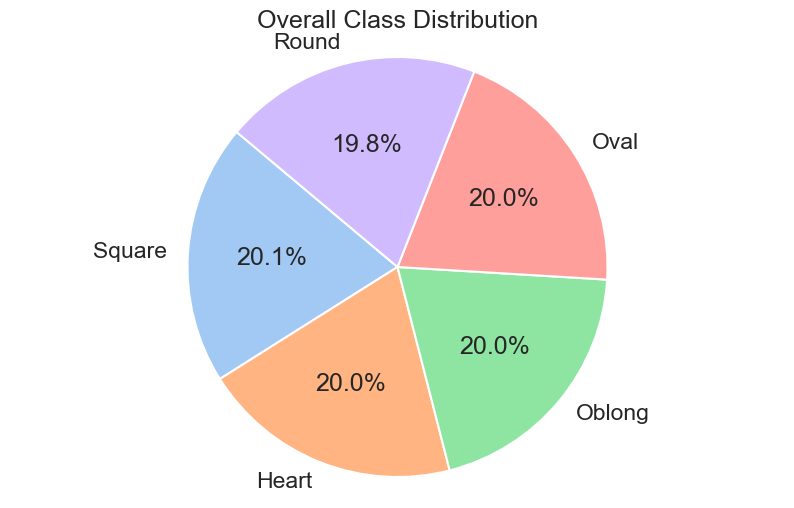

In [36]:
# Import necessary libraries for analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

# Set plotting style for a professional look
sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (10, 6)

# -----------------------------
# Step 1: Visualize Overall Class Distribution
# -----------------------------
# Create a pie chart for the overall class distribution from the full DataFrame `df`
overall_counts = df['label'].value_counts()
labels = overall_counts.index.tolist()
sizes = overall_counts.tolist()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
ax.axis('equal')  # Ensure that pie is drawn as a circle.
plt.title("Overall Class Distribution")
plt.show()


In [37]:

# Add a column indicating the split for easier analysis later
train_df = train_df.copy()
val_df = val_df.copy()
test_df = test_df.copy()
train_df['split'] = 'Train'
val_df['split'] = 'Validation'
test_df['split'] = 'Test'

# Combine all splits into one DataFrame for visualization
combined_df = pd.concat([train_df, val_df, test_df], axis=0)
print("\nSamples per split:")
print(combined_df['split'].value_counts())



Samples per split:
split
Train         3485
Validation     996
Test           498
Name: count, dtype: int64


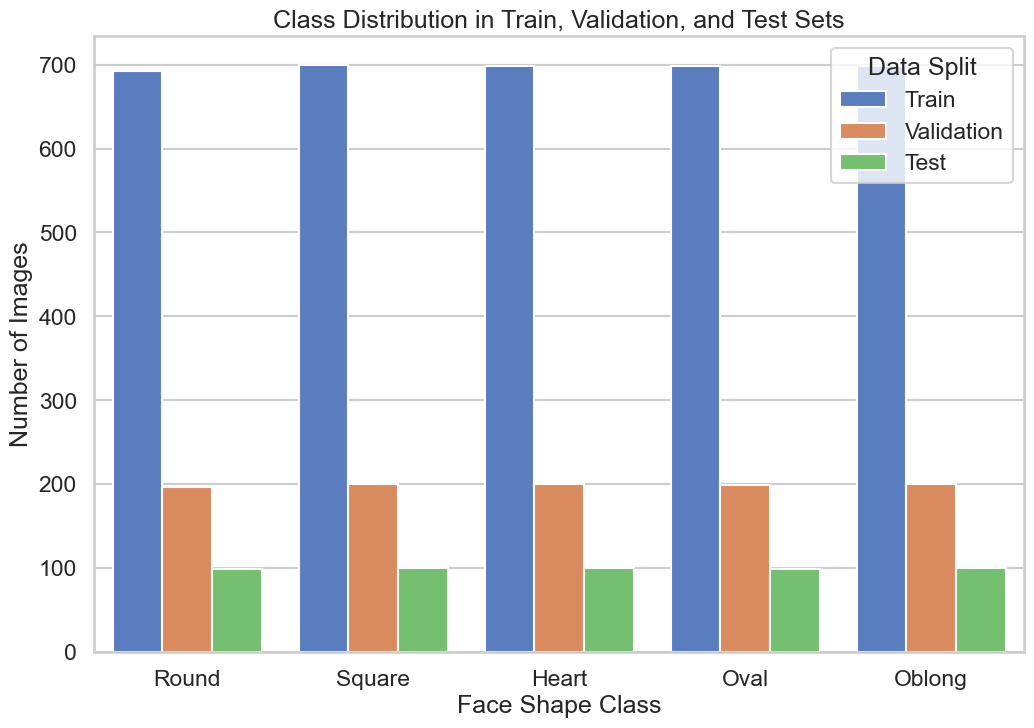

In [38]:
# -----------------------------
# Step 3: Visualize Distribution Per Split
# -----------------------------
# Countplot: Visualize the distribution of classes within each data split
plt.figure(figsize=(12, 8))
sns.countplot(data=combined_df, x='label', hue='split', palette="muted")
plt.title("Class Distribution in Train, Validation, and Test Sets")
plt.xlabel("Face Shape Class")
plt.ylabel("Number of Images")
plt.legend(title="Data Split")
plt.show()

# Pie c

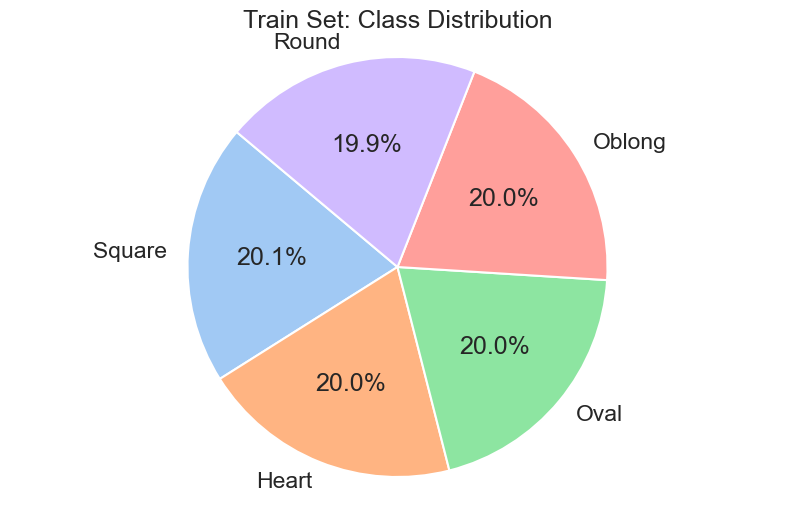

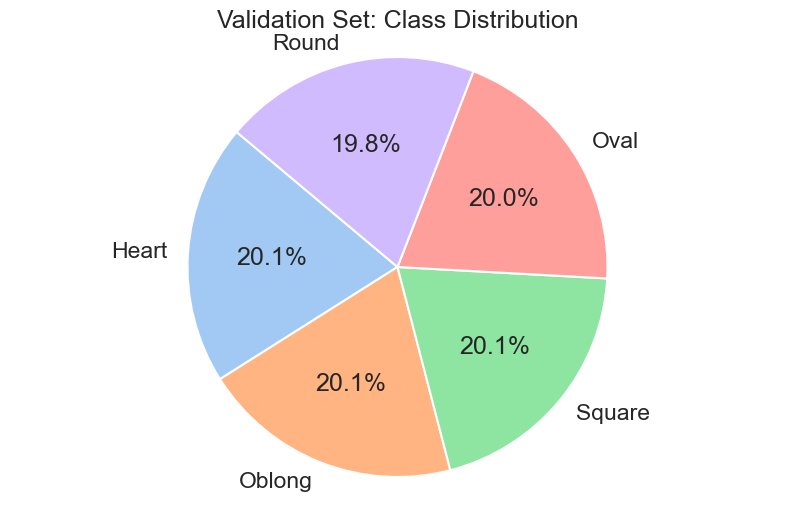

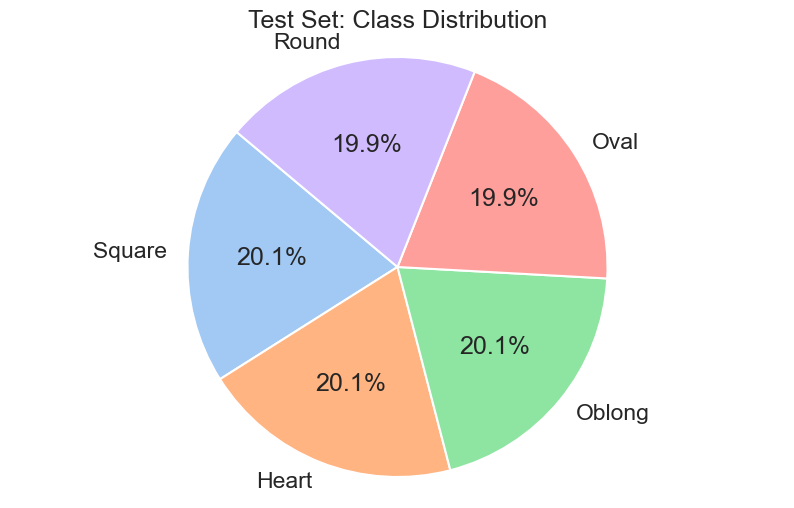

In [39]:
#harts per split for a detailed view
splits = ['Train', 'Validation', 'Test']
for s in splits:
    subset = combined_df[combined_df['split'] == s]
    counts = subset['label'].value_counts()
    labels = counts.index.tolist()
    sizes = counts.tolist()
    
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    ax.axis('equal')
    plt.title(f"{s} Set: Class Distribution")
    plt.show()


In [40]:

# -----------------------------
# Step 4: Additional Analysis - Display Sample Images
# -----------------------------
# Helper function to display images in a grid
def display_images(image_paths, title, cols=5):
    rows = (len(image_paths) + cols - 1) // cols
    plt.figure(figsize=(15, 3 * rows))
    for i, path in enumerate(image_paths):
        plt.subplot(rows, cols, i + 1)
        try:
            image = Image.open(path)
            plt.imshow(image)
            plt.axis("off")
        except Exception as e:
            print(f"Error loading image {path}: {e}")
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

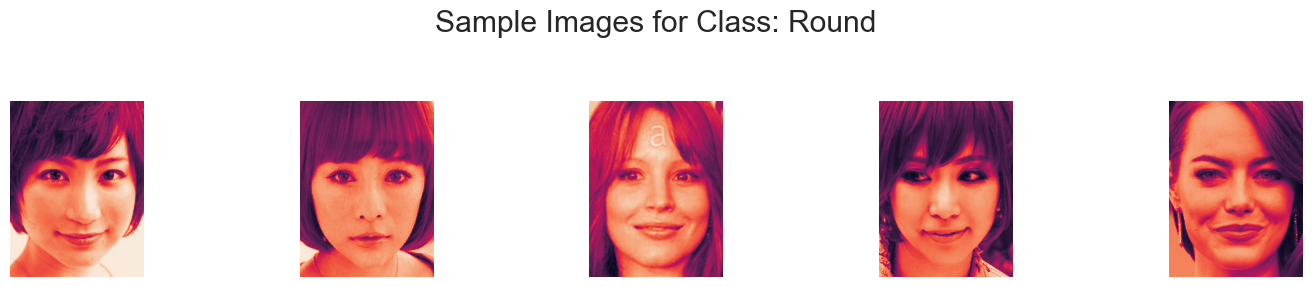

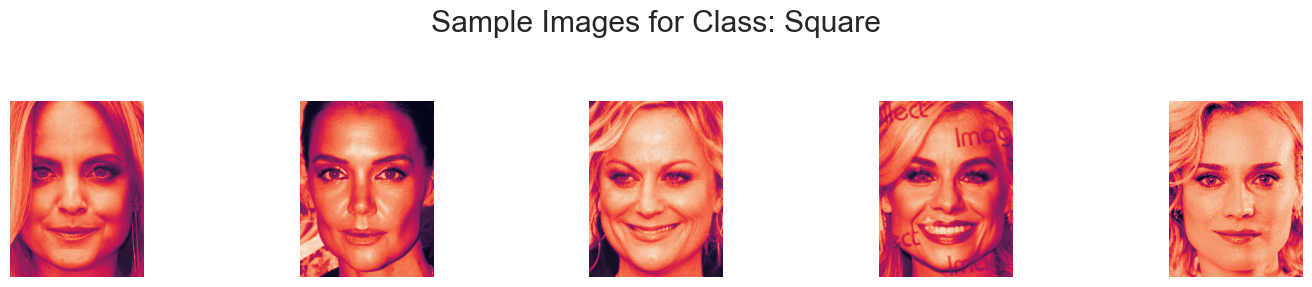

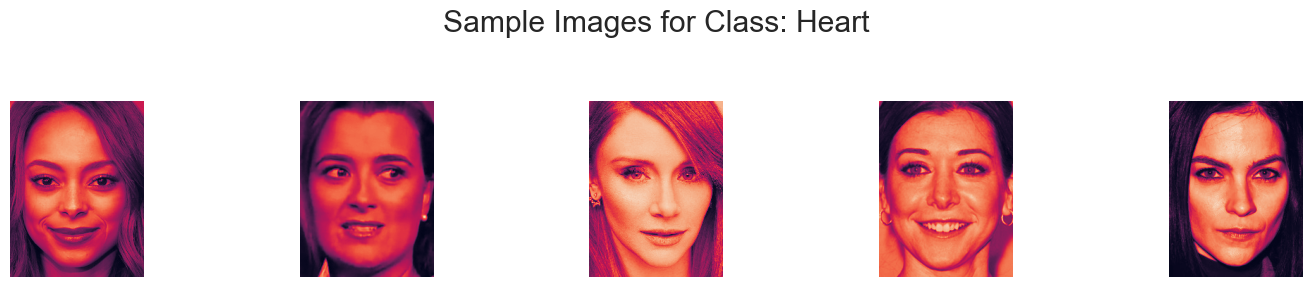

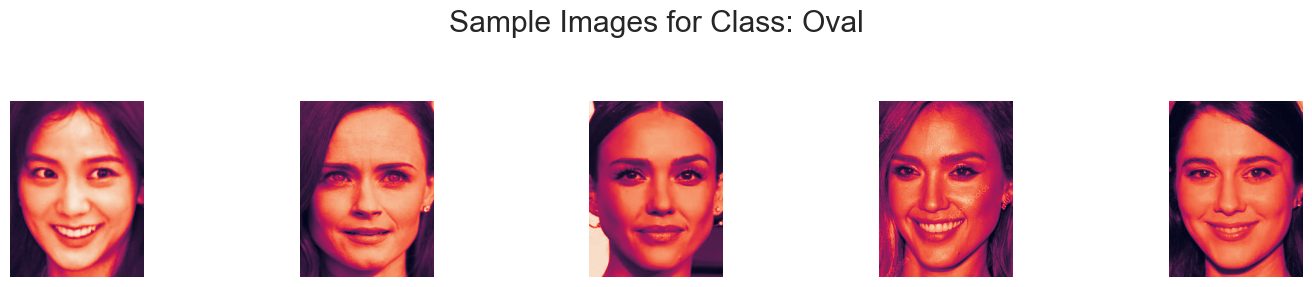

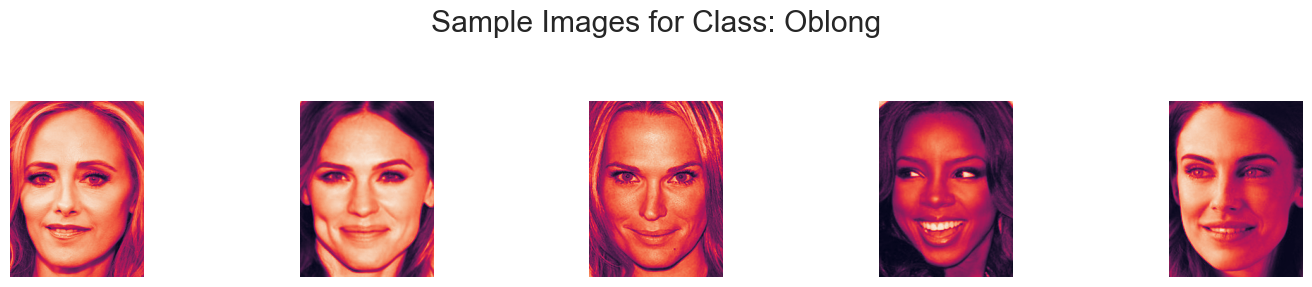

In [41]:





# For each class in the training set, randomly select and display 5 sample images
unique_classes = train_df['label'].unique()
for cls in unique_classes:
    sample_paths = train_df[train_df['label'] == cls]['filepath'].tolist()
    sample_paths = random.sample(sample_paths, min(5, len(sample_paths)))
    display_images(sample_paths, title=f"Sample Images for Class: {cls}")


# transformation and augmentations

In [64]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch

# ========================
# Configuration
# ========================
IMAGE_SIZE = 224
BATCH_SIZE = 64
NUM_WORKERS = 0
CSV_PATHS = {
    "train": "train_data.csv",
    "val": "val_data.csv",
    "test": "test_data.csv"
}

# ========================
# Augmentations
# ========================


train_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),

    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),

    transforms.RandomAffine(
        degrees=10,
        translate=(0.05, 0.05)
    ),

    transforms.ColorJitter(
        brightness=0.15,
        contrast=0.15,
        saturation=0.1,
        hue=0.02
    ),

    transforms.RandomGrayscale(p=0.05),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
    
    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_test_transforms = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


# ========================
# Custom Dataset Class
# ========================
class FaceShapeDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform

        # Encode labels to integers
        self.label_to_idx = {label: idx for idx, label in enumerate(sorted(self.data['label'].unique()))}
        self.idx_to_label = {idx: label for label, idx in self.label_to_idx.items()}
        self.data['label_idx'] = self.data['label'].map(self.label_to_idx)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path = self.data.iloc[idx]['filepath']
        label = self.data.iloc[idx]['label_idx']
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, label


# ========================
# DataLoader Setup
# ========================
def get_dataloaders():
    train_dataset = FaceShapeDataset(CSV_PATHS["train"], transform=train_transforms)
    val_dataset = FaceShapeDataset(CSV_PATHS["val"], transform=val_test_transforms)
    test_dataset = FaceShapeDataset(CSV_PATHS["test"], transform=val_test_transforms)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

    return train_loader, val_loader, test_loader, train_dataset.idx_to_label




In [65]:

train_loader, val_loader, test_loader, idx_to_label = get_dataloaders()
print("DataLoaders ready!")



DataLoaders ready!


In [66]:
# Preview first batch
images, labels = next(iter(train_loader))
print(f"Image batch shape: {images.shape}")
print(f"Labels: {labels[:10]}")
print(f"Decoded labels: {[idx_to_label[int(lbl)] for lbl in labels[:10]]}")

Image batch shape: torch.Size([64, 3, 224, 224])
Labels: tensor([0, 2, 3, 2, 0, 4, 2, 0, 4, 2])
Decoded labels: ['Heart', 'Oval', 'Round', 'Oval', 'Heart', 'Square', 'Oval', 'Heart', 'Square', 'Oval']


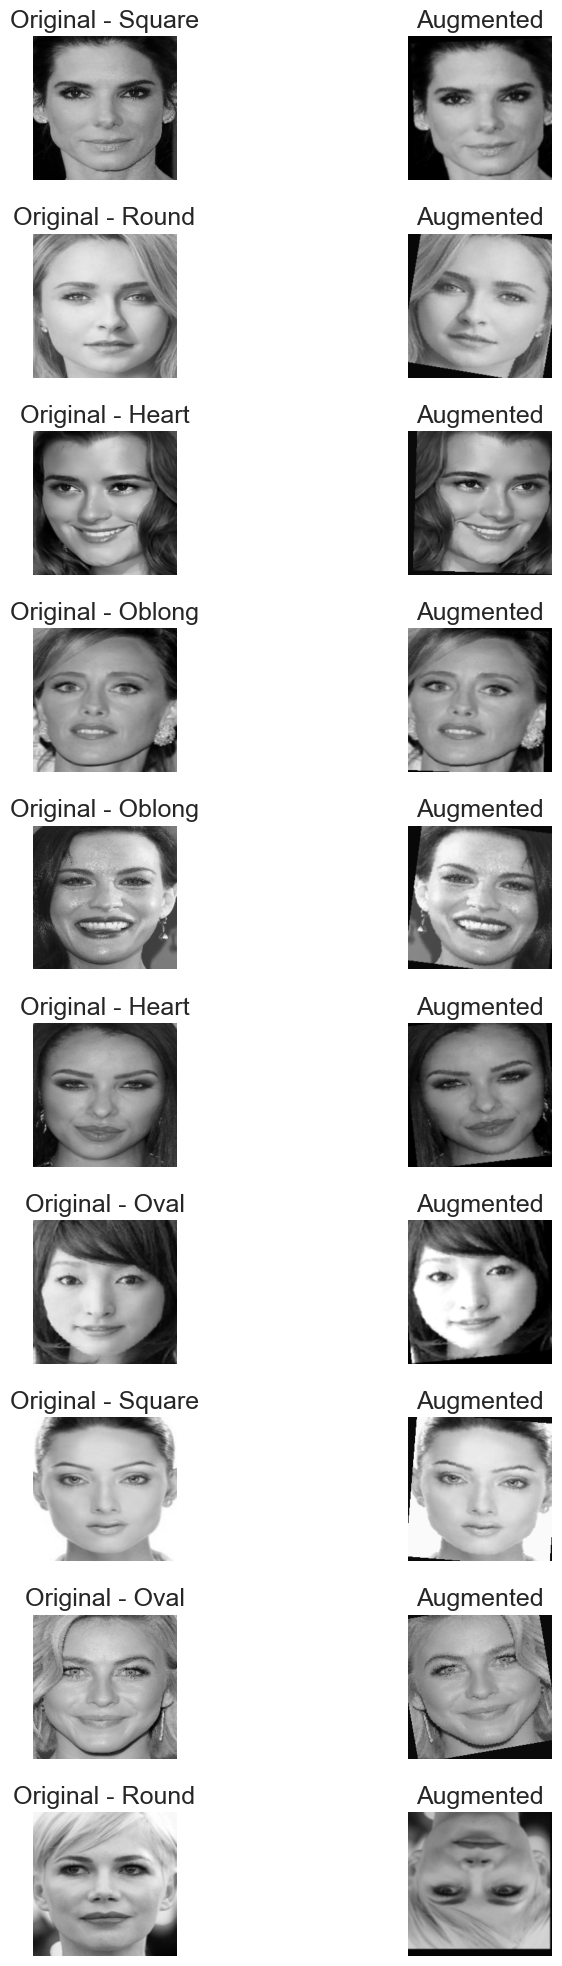

In [17]:
import matplotlib.pyplot as plt
import random
from torchvision import transforms
from PIL import Image
import pandas as pd

# ----------------------------
# Use existing config
# ----------------------------
IMAGE_SIZE = 224
CSV_PATH = "train_data.csv"

# ----------------------------
# Define transforms
# ----------------------------
original_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE))
])

# Your existing augmentation pipeline
augmented_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),
    transforms.RandomAffine(degrees=10, translate=(0.05, 0.05)),
    transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.1, hue=0.02),
    transforms.RandomGrayscale(p=0.05),
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 1.0)),
])

# ----------------------------
# Load and sample data
# ----------------------------
df = pd.read_csv(CSV_PATH)
sample_df = df.sample(n=10, random_state=42).reset_index(drop=True)

# ----------------------------
# Show original vs augmented
# ----------------------------
plt.figure(figsize=(10, 20))
for i, row in sample_df.iterrows():
    img_path = row['filepath']
    label = row['label']
    img = Image.open(img_path).convert("RGB")
    
    original = original_transform(img)
    augmented = augmented_transform(img)

    # Original
    plt.subplot(10, 2, 2 * i + 1)
    plt.imshow(original)
    plt.title(f"Original - {label}")
    plt.axis("off")

    # Augmented
    plt.subplot(10, 2, 2 * i + 2)
    plt.imshow(augmented)
    plt.title("Augmented")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [67]:

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available!")
    # Get the current device
    current_device = torch.cuda.current_device()
    print(f"Current CUDA device: {current_device}")

    # Get the number of GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")

    # Get the name of the GPU
    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available.")






CUDA is available!
Current CUDA device: 0
Number of available GPUs: 1
GPU 0: NVIDIA GeForce RTX 4050 Laptop GPU


# modeling

In [82]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FaceShapeCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(FaceShapeCNN, self).__init__()

        self.features = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),  # (224x224) -> (224x224)
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2),  # (224x224) -> (112x112)

            # Block 2
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),  # (112x112) -> (56x56)

            # Block 3
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),  # (56x56) -> (28x28)

            # Block 4
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2),  # (28x28) -> (14x14)

            # Global Average Pooling
            nn.AdaptiveAvgPool2d((1, 1))  # (14x14) -> (1x1)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),               # (256, 1, 1) -> (256)
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [83]:
from torchsummary import summary

In [84]:
# Instantiate the model
model = FaceShapeCNN(num_classes=5)

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Print model summary
print(model)


FaceShapeCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=

In [85]:
summary(model, (3, 224, 224))  # Adjusted input shape to 224x224 for resized images


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
       BatchNorm2d-2         [-1, 32, 224, 224]              64
              ReLU-3         [-1, 32, 224, 224]               0
            Conv2d-4         [-1, 32, 224, 224]           9,248
       BatchNorm2d-5         [-1, 32, 224, 224]              64
              ReLU-6         [-1, 32, 224, 224]               0
         MaxPool2d-7         [-1, 32, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          18,496
       BatchNorm2d-9         [-1, 64, 112, 112]             128
             ReLU-10         [-1, 64, 112, 112]               0
           Conv2d-11         [-1, 64, 112, 112]          36,928
      BatchNorm2d-12         [-1, 64, 112, 112]             128
             ReLU-13         [-1, 64, 112, 112]               0
        MaxPool2d-14           [-1, 64,

In [86]:
import os

class EarlyStopping:
    def __init__(self, patience=10, verbose=False, delta=0, monitor='loss'):
        """
        patience: How many epochs to wait before stopping.
        verbose: Whether to print progress.
        delta: Minimum change to qualify as an improvement.
        monitor: What to monitor ('loss' or 'accuracy').
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = float('inf') if monitor == 'loss' else -float('inf')  # Initialize based on monitor type
        self.best_epoch = 0
        self.early_stop = False
        self.delta = delta
        self.monitor = monitor  # What to monitor: 'loss' or 'accuracy'

    def __call__(self, val_score, epoch, model_weights, model_name_prefix):
        """
        val_score: The validation loss/accuracy in the current epoch.
        epoch: The current epoch.
        model_weights: The weights of the model (usually model.state_dict()).
        model_name_prefix: The prefix for the model's name (e.g., 'model_1', 'model_2').
        """
        # If monitoring 'loss', we expect the value to decrease
        if self.monitor == 'loss':
            if val_score < self.best_score - self.delta:
                self.best_score = val_score
                self.best_epoch = epoch
                self.counter = 0
                self.save_best_weights(model_weights, model_name_prefix)
            else:
                self.counter += 1
        # If monitoring 'accuracy', we expect the value to increase
        elif self.monitor == 'accuracy':
            if val_score > self.best_score + self.delta:
                self.best_score = val_score
                self.best_epoch = epoch
                self.counter = 0
                self.save_best_weights(model_weights, model_name_prefix)
            else:
                self.counter += 1

        if self.counter >= self.patience:
            self.early_stop = True
            if self.verbose:
                print(f"Early stopping triggered after {self.counter} epochs of no improvement.")

    def save_best_weights(self, model_weights, model_name_prefix):
        """
        Save the model weights with a unique name for each model.
        model_name_prefix: The prefix for the model's name (e.g., 'model_1', 'model_2').
        """
        model_name = f"{model_name_prefix}_epoch_{self.best_epoch + 1}.pth"

        # Clean up previous saved model files (optional, to avoid disk clutter)
        for file in os.listdir():
            if file.startswith(model_name_prefix) and file != model_name:
                os.remove(file)
                if self.verbose:
                    print(f"🗑️ Deleted old model file: {file}")

        torch.save(model_weights, model_name)
        if self.verbose:
            print(f"✅ Best model weights saved to {model_name}.")
    

In [87]:

# Training loop
best_val_loss = float('inf')  # Initialize best validation loss
best_model_weights = None

def train_and_validate(model, train_loader, valid_loader, optimizer, scheduler, criterion, model_name_prefix, epochs=25, device=None, early_stopping=None):

    # Store losses and accuracies
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []
    auc_scores = []

    for epoch in range(epochs):
        print(f'Epoch {epoch + 1}/{epochs}')
        print('-' * 50)

        # Training phase
        model.train()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            # Ensure labels are Long for CrossEntropyLoss
            labels = labels.long()  # Cast labels to Long

            # Mixed precision forward pass
            with torch.amp.autocast('cuda'):

                raw_outputs = model(inputs)  # Get raw logits (not passed through softmax)
                loss = criterion(raw_outputs, labels)  # Compute loss

            # Backward pass with mixed precision
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item() * inputs.size(0)

            # Compute predictions (Get class with highest logit)
            with torch.no_grad():
                _, preds = torch.max(raw_outputs, 1)  # Preds are class indices
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Store training loss and accuracy
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        # Validation phase
        model.eval()
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in valid_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Ensure labels are Long for CrossEntropyLoss
                labels = labels.long()  # Cast labels to Long

                with torch.amp.autocast('cuda'):
                    raw_outputs = model(inputs)  # Get raw logits
                    loss = criterion(raw_outputs, labels)  # Compute loss

                running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(raw_outputs, 1)  # Preds are class indices
                correct_preds += torch.sum(preds == labels.data)
                total_preds += labels.size(0)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        epoch_loss = running_loss / len(valid_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds
        print(f'Validation Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

        # Store validation loss and accuracy
        valid_losses.append(epoch_loss)
        valid_accuracies.append(epoch_acc.item())


        # Step the scheduler based on validation loss
        scheduler.step(epoch_loss)

        # ✅ Early stopping check: save model based on validation loss
        if early_stopping is not None:
            early_stopping(epoch_loss, epoch, model.state_dict(), model_name_prefix="model")
            if early_stopping.early_stop:
                print(f"🚨 Early stopping triggered at epoch {epoch+1}.")
                break

        # ✅ Display confusion matrix & classification report every 5 epochs
        if epoch % 5 == 0 or early_stopping.early_stop:
            cm = confusion_matrix(all_labels, all_preds)
            plot_confusion_matrix(cm, classes=[i for i in range(len(set(all_labels)))])
            print("Classification Report:")
            print(classification_report(all_labels, all_preds))

    # ✅ Load the best model weights from early stopping
    print("Loading best model weights...")
    model.load_state_dict(torch.load("model_epoch_{}.pth".format(early_stopping.best_epoch + 1)))

    # ✅ Plot training metrics
    plot_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies)


    return model





# Helper function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


# Helper function to plot losses, accuracies, and AUC scores
def plot_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(16, 8))

    # Plot training and validation loss
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, label='Training Loss', color='blue')
    plt.plot(epochs, valid_losses, label='Validation Loss', color='red')
    plt.title('Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy', color='blue')
    plt.plot(epochs, valid_accuracies, label='Validation Accuracy', color='red')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()



    plt.tight_layout()
    plt.show()


In [88]:
import torch
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def test_model(model, test_loader, criterion, device, num_classes=5):
    """
    Evaluates the model on the test set, computes loss and accuracy,
    and displays the confusion matrix and classification report.

    Args:
        model: The trained PyTorch model.
        test_loader: DataLoader for the test set.
        criterion: The loss function used during training (e.g., CrossEntropyLoss).
        device: The device to run inference on (e.g., torch.device('cuda') or torch.device('cpu')).
        num_classes: The number of classes in the classification task.
    """
    model.eval()  # Set model to evaluation mode
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Use autocast for mixed precision inference
            with torch.amp.autocast('cuda'):
                raw_outputs = model(inputs)  # Get raw logits from the model
                loss = criterion(raw_outputs, labels)  # Compute loss

            running_loss += loss.item() * inputs.size(0)

            # Get class predictions (highest probability for multi-class)
            _, preds = torch.max(raw_outputs, 1)

            # Update accuracy counters
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

            # Accumulate for metrics
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate overall test loss and accuracy
    test_loss = running_loss / len(test_loader.dataset)
    test_accuracy = correct_preds.double() / total_preds

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Compute confusion matrix and classification report
    cm = confusion_matrix(all_labels, all_preds)
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=[str(i) for i in range(num_classes)]))

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(num_classes)], yticklabels=[str(i) for i in range(num_classes)])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.cuda.amp import GradScaler


# ✅ Class weights (based on your dataset size)
# Assuming classes like this: [200, 200, 199, 197, 200]
class_counts = torch.tensor([200, 200, 199, 197, 200], dtype=torch.float)
weights = 1.0 / class_counts
weights = weights / weights.sum()
loss_fn = nn.CrossEntropyLoss(weight=weights.to(device))

# ✅ Optimizer
optimizer = optim.AdamW(
    model.parameters(),
    lr=2e-4,              # Raised for better initial learning
    weight_decay=2e-4     # Softer regularization
)

# ✅ LR Scheduler
scheduler = ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,           # More aggressive drop
    patience=3,           # React quicker to plateaus
    threshold=0.001,
    verbose=True
)

# ✅ AMP for speed
scaler = GradScaler()

# ✅ Epochs
num_epochs = 100

print(f"✅ Model Initialized on {device}")


✅ Model Initialized on cuda


C:\Users\alira\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
C:\Users\alira\AppData\Local\Temp\ipykernel_11476\1057034947.py:33: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


Epoch 1/100
--------------------------------------------------
Training Loss: 1.6222, Accuracy: 0.2121
Validation Loss: 1.5972, Accuracy: 0.2641
✅ Best model weights saved to model_epoch_1.pth.


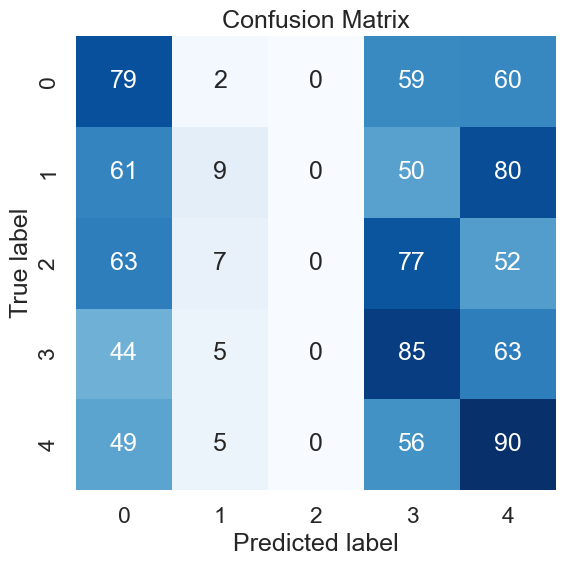

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.40      0.32       200
           1       0.32      0.04      0.08       200
           2       0.00      0.00      0.00       199
           3       0.26      0.43      0.32       197
           4       0.26      0.45      0.33       200

    accuracy                           0.26       996
   macro avg       0.22      0.26      0.21       996
weighted avg       0.22      0.26      0.21       996

Epoch 2/100
--------------------------------------------------


C:\Users\alira\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alira\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alira\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Training Loss: 1.6084, Accuracy: 0.2253
Validation Loss: 1.5912, Accuracy: 0.2349
🗑️ Deleted old model file: model_epoch_1.pth
✅ Best model weights saved to model_epoch_2.pth.
Epoch 3/100
--------------------------------------------------
Training Loss: 1.5960, Accuracy: 0.2413
Validation Loss: 1.5868, Accuracy: 0.2600
🗑️ Deleted old model file: model_epoch_2.pth
✅ Best model weights saved to model_epoch_3.pth.
Epoch 4/100
--------------------------------------------------
Training Loss: 1.5925, Accuracy: 0.2442
Validation Loss: 1.5839, Accuracy: 0.2731
🗑️ Deleted old model file: model_epoch_3.pth
✅ Best model weights saved to model_epoch_4.pth.
Epoch 5/100
--------------------------------------------------
Training Loss: 1.5810, Accuracy: 0.2617
Validation Loss: 1.5882, Accuracy: 0.2540
Epoch 6/100
--------------------------------------------------
Training Loss: 1.5694, Accuracy: 0.2775
Validation Loss: 1.6262, Accuracy: 0.2480


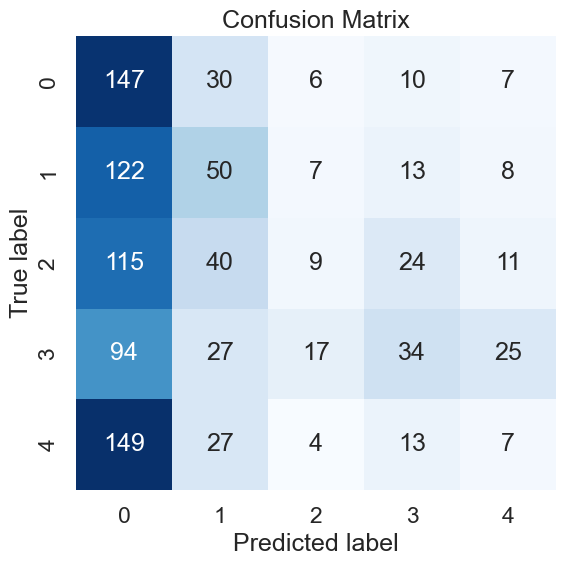

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.73      0.36       200
           1       0.29      0.25      0.27       200
           2       0.21      0.05      0.07       199
           3       0.36      0.17      0.23       197
           4       0.12      0.04      0.05       200

    accuracy                           0.25       996
   macro avg       0.24      0.25      0.20       996
weighted avg       0.24      0.25      0.20       996

Epoch 7/100
--------------------------------------------------
Training Loss: 1.5662, Accuracy: 0.2720
Validation Loss: 1.6275, Accuracy: 0.2631
Epoch 8/100
--------------------------------------------------
Training Loss: 1.5519, Accuracy: 0.2846
Validation Loss: 1.5401, Accuracy: 0.3012
🗑️ Deleted old model file: model_epoch_4.pth
✅ Best model weights saved to model_epoch_8.pth.
Epoch 9/100
--------------------------------------------------
Training Loss: 1.5525, Accuracy: 0.2835
V

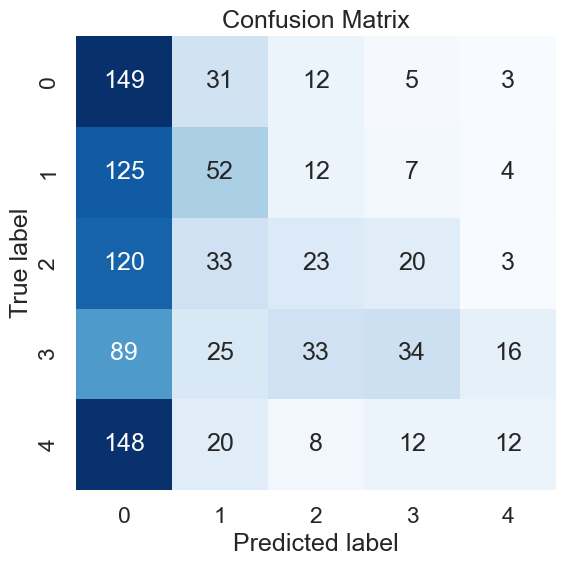

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.74      0.36       200
           1       0.32      0.26      0.29       200
           2       0.26      0.12      0.16       199
           3       0.44      0.17      0.25       197
           4       0.32      0.06      0.10       200

    accuracy                           0.27       996
   macro avg       0.31      0.27      0.23       996
weighted avg       0.31      0.27      0.23       996

Epoch 12/100
--------------------------------------------------
Training Loss: 1.5181, Accuracy: 0.3133
Validation Loss: 1.4936, Accuracy: 0.3293
🗑️ Deleted old model file: model_epoch_9.pth
✅ Best model weights saved to model_epoch_12.pth.
Epoch 13/100
--------------------------------------------------
Training Loss: 1.5063, Accuracy: 0.3179
Validation Loss: 1.4734, Accuracy: 0.3534
🗑️ Deleted old model file: model_epoch_12.pth
✅ Best model weights saved to model_epoch_13.pth.
Epoch

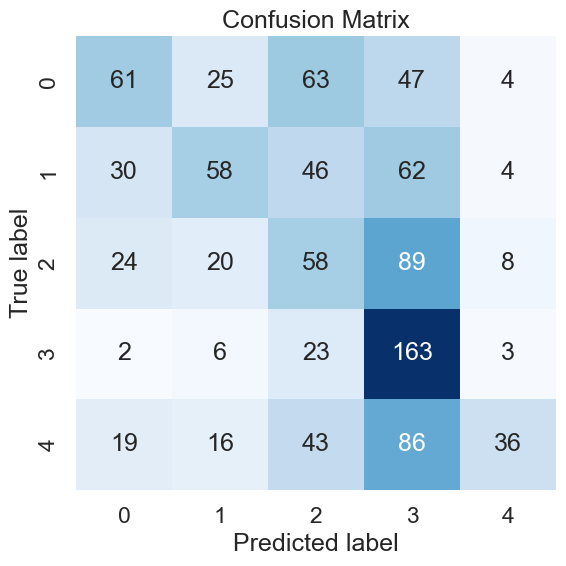

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.30      0.36       200
           1       0.46      0.29      0.36       200
           2       0.25      0.29      0.27       199
           3       0.36      0.83      0.51       197
           4       0.65      0.18      0.28       200

    accuracy                           0.38       996
   macro avg       0.44      0.38      0.36       996
weighted avg       0.44      0.38      0.36       996

Epoch 17/100
--------------------------------------------------
Training Loss: 1.4597, Accuracy: 0.3555
Validation Loss: 2.0033, Accuracy: 0.2661
Epoch 18/100
--------------------------------------------------
Training Loss: 1.4529, Accuracy: 0.3578
Validation Loss: 1.6235, Accuracy: 0.3183
Epoch 19/100
--------------------------------------------------
Training Loss: 1.4426, Accuracy: 0.3727
Validation Loss: 1.5509, Accuracy: 0.3494
Epoch 20/100
-------------------------------------

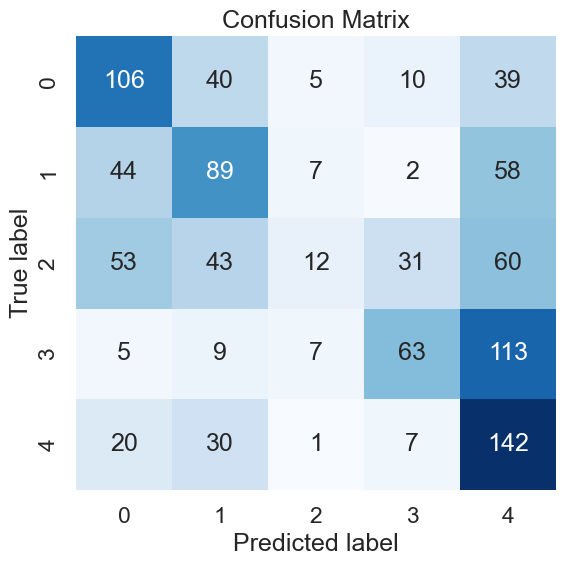

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.53      0.50       200
           1       0.42      0.45      0.43       200
           2       0.38      0.06      0.10       199
           3       0.56      0.32      0.41       197
           4       0.34      0.71      0.46       200

    accuracy                           0.41       996
   macro avg       0.43      0.41      0.38       996
weighted avg       0.43      0.41      0.38       996

Epoch 22/100
--------------------------------------------------
Training Loss: 1.3558, Accuracy: 0.4187
Validation Loss: 1.6932, Accuracy: 0.3092
Epoch 23/100
--------------------------------------------------
Training Loss: 1.3513, Accuracy: 0.4307
Validation Loss: 1.6473, Accuracy: 0.3404
Epoch 24/100
--------------------------------------------------
Training Loss: 1.3311, Accuracy: 0.4359
Validation Loss: 1.6482, Accuracy: 0.2922
Epoch 25/100
-------------------------------------

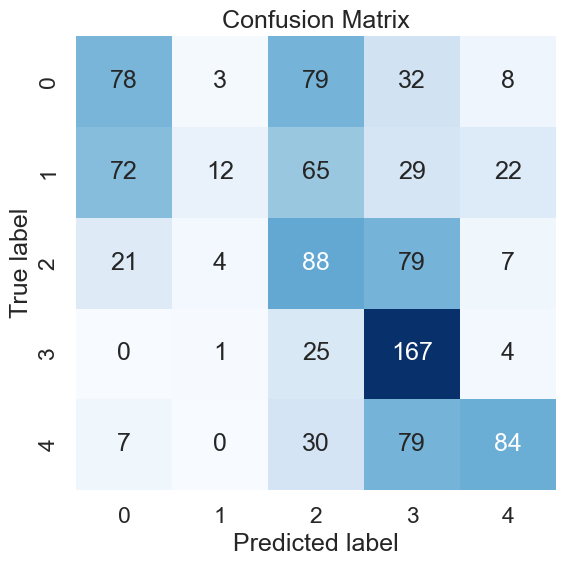

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.39      0.41       200
           1       0.60      0.06      0.11       200
           2       0.31      0.44      0.36       199
           3       0.43      0.85      0.57       197
           4       0.67      0.42      0.52       200

    accuracy                           0.43       996
   macro avg       0.49      0.43      0.39       996
weighted avg       0.49      0.43      0.39       996

Epoch 27/100
--------------------------------------------------
Training Loss: 1.2938, Accuracy: 0.4631
Validation Loss: 1.2144, Accuracy: 0.4930
🗑️ Deleted old model file: model_epoch_25.pth
✅ Best model weights saved to model_epoch_27.pth.
Epoch 28/100
--------------------------------------------------
Training Loss: 1.2596, Accuracy: 0.4697
Validation Loss: 1.3501, Accuracy: 0.4197
Epoch 29/100
--------------------------------------------------
Training Loss: 1.2747, Accuracy: 0.4

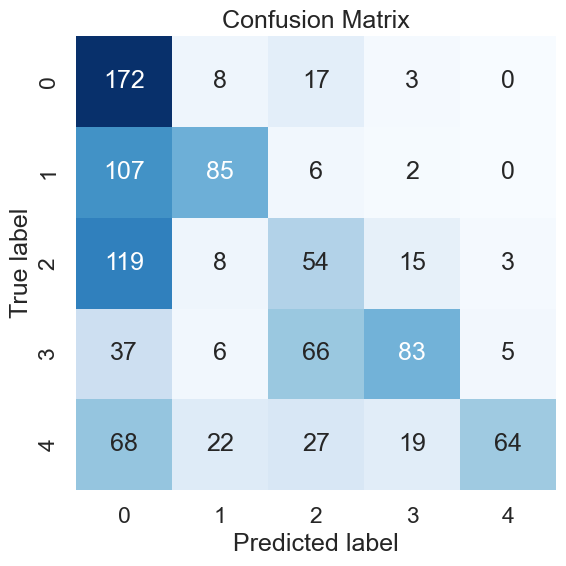

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.86      0.49       200
           1       0.66      0.42      0.52       200
           2       0.32      0.27      0.29       199
           3       0.68      0.42      0.52       197
           4       0.89      0.32      0.47       200

    accuracy                           0.46       996
   macro avg       0.58      0.46      0.46       996
weighted avg       0.58      0.46      0.46       996

Epoch 32/100
--------------------------------------------------
Training Loss: 1.2024, Accuracy: 0.5096
Validation Loss: 1.6780, Accuracy: 0.3725
Epoch 33/100
--------------------------------------------------
Training Loss: 1.1918, Accuracy: 0.5050
Validation Loss: 1.8120, Accuracy: 0.3303
Epoch 34/100
--------------------------------------------------
Training Loss: 1.1476, Accuracy: 0.5291
Validation Loss: 1.1409, Accuracy: 0.5090
🗑️ Deleted old model file: model_epoch_29.pth
✅ Be

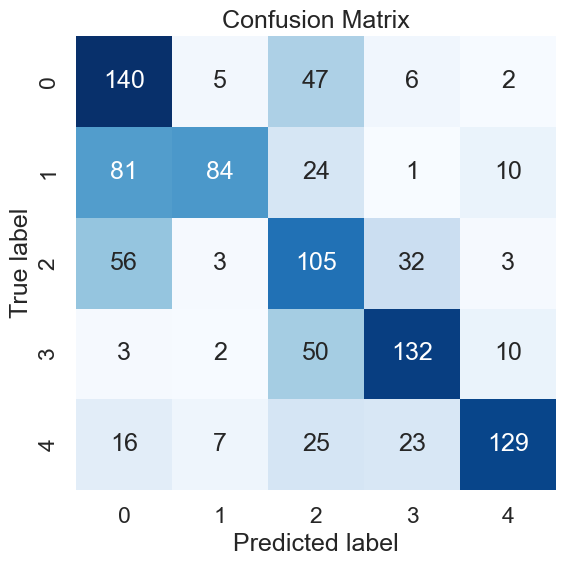

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.70      0.56       200
           1       0.83      0.42      0.56       200
           2       0.42      0.53      0.47       199
           3       0.68      0.67      0.68       197
           4       0.84      0.65      0.73       200

    accuracy                           0.59       996
   macro avg       0.65      0.59      0.60       996
weighted avg       0.65      0.59      0.60       996

Epoch 37/100
--------------------------------------------------
Training Loss: 1.1106, Accuracy: 0.5570
Validation Loss: 0.9788, Accuracy: 0.6225
🗑️ Deleted old model file: model_epoch_36.pth
✅ Best model weights saved to model_epoch_37.pth.
Epoch 38/100
--------------------------------------------------
Training Loss: 1.0977, Accuracy: 0.5636
Validation Loss: 1.2991, Accuracy: 0.4729
Epoch 39/100
--------------------------------------------------
Training Loss: 1.0837, Accuracy: 0.5

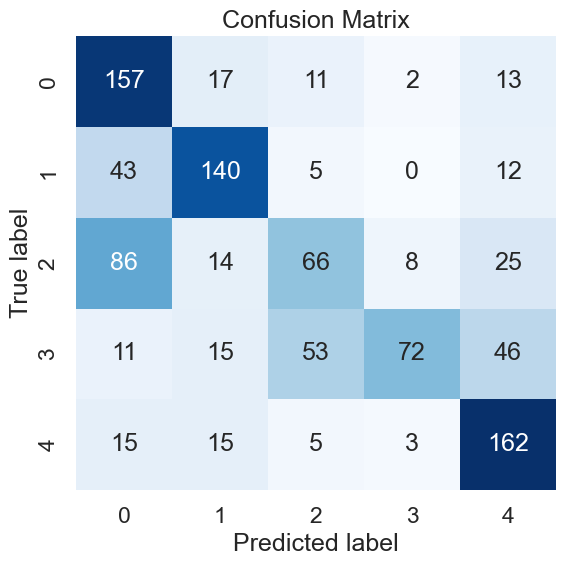

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.79      0.61       200
           1       0.70      0.70      0.70       200
           2       0.47      0.33      0.39       199
           3       0.85      0.37      0.51       197
           4       0.63      0.81      0.71       200

    accuracy                           0.60       996
   macro avg       0.63      0.60      0.58       996
weighted avg       0.63      0.60      0.58       996

Epoch 42/100
--------------------------------------------------
Training Loss: 1.0480, Accuracy: 0.5911
Validation Loss: 1.1743, Accuracy: 0.5221
Epoch 43/100
--------------------------------------------------
Training Loss: 1.0336, Accuracy: 0.5851
Validation Loss: 1.2546, Accuracy: 0.4739
Epoch 44/100
--------------------------------------------------
Training Loss: 1.0105, Accuracy: 0.6052
Validation Loss: 0.9319, Accuracy: 0.6486
Epoch 45/100
-------------------------------------

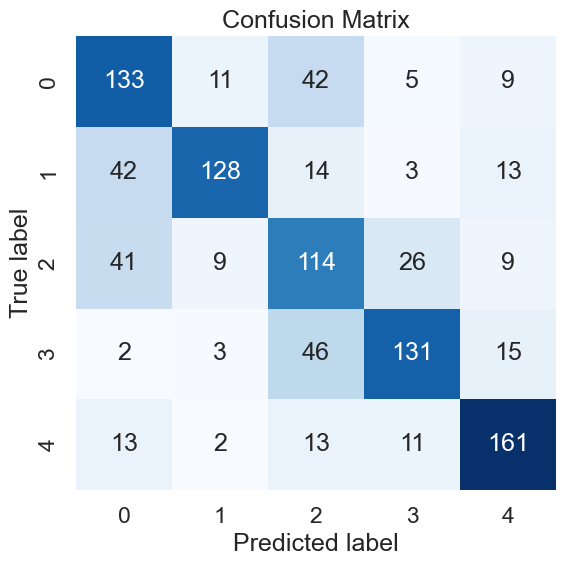

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.67      0.62       200
           1       0.84      0.64      0.73       200
           2       0.50      0.57      0.53       199
           3       0.74      0.66      0.70       197
           4       0.78      0.81      0.79       200

    accuracy                           0.67       996
   macro avg       0.69      0.67      0.67       996
weighted avg       0.69      0.67      0.67       996

Epoch 47/100
--------------------------------------------------
Training Loss: 1.0081, Accuracy: 0.6037
Validation Loss: 0.8941, Accuracy: 0.6556
Epoch 48/100
--------------------------------------------------
Training Loss: 1.0091, Accuracy: 0.5914
Validation Loss: 0.8674, Accuracy: 0.6697
Epoch 49/100
--------------------------------------------------
Training Loss: 0.9835, Accuracy: 0.6138
Validation Loss: 0.8559, Accuracy: 0.6787
🗑️ Deleted old model file: model_epoch_46.pth
✅ Be

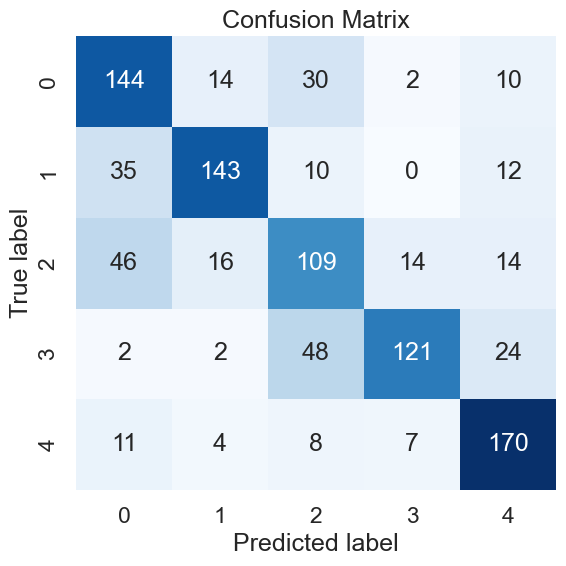

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.72      0.66       200
           1       0.80      0.71      0.75       200
           2       0.53      0.55      0.54       199
           3       0.84      0.61      0.71       197
           4       0.74      0.85      0.79       200

    accuracy                           0.69       996
   macro avg       0.70      0.69      0.69       996
weighted avg       0.70      0.69      0.69       996

Epoch 52/100
--------------------------------------------------
Training Loss: 0.9737, Accuracy: 0.6172
Validation Loss: 0.8562, Accuracy: 0.6757
Epoch 53/100
--------------------------------------------------
Training Loss: 0.9674, Accuracy: 0.6195
Validation Loss: 0.8224, Accuracy: 0.6958
🗑️ Deleted old model file: model_epoch_51.pth
✅ Best model weights saved to model_epoch_53.pth.
Epoch 54/100
--------------------------------------------------
Training Loss: 0.9583, Accuracy: 0.6

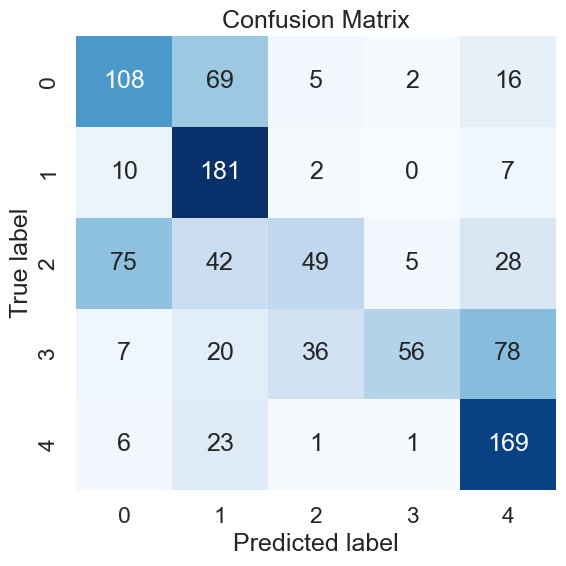

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       200
           1       0.54      0.91      0.68       200
           2       0.53      0.25      0.34       199
           3       0.88      0.28      0.43       197
           4       0.57      0.84      0.68       200

    accuracy                           0.57       996
   macro avg       0.61      0.56      0.53       996
weighted avg       0.61      0.57      0.53       996

Epoch 57/100
--------------------------------------------------
Training Loss: 0.9468, Accuracy: 0.6275
Validation Loss: 0.8377, Accuracy: 0.6757
Epoch 58/100
--------------------------------------------------
Training Loss: 0.9602, Accuracy: 0.6307
Validation Loss: 1.1178, Accuracy: 0.5452
Epoch 59/100
--------------------------------------------------
Training Loss: 0.9425, Accuracy: 0.6255
Validation Loss: 0.8147, Accuracy: 0.6908
Epoch 60/100
-------------------------------------

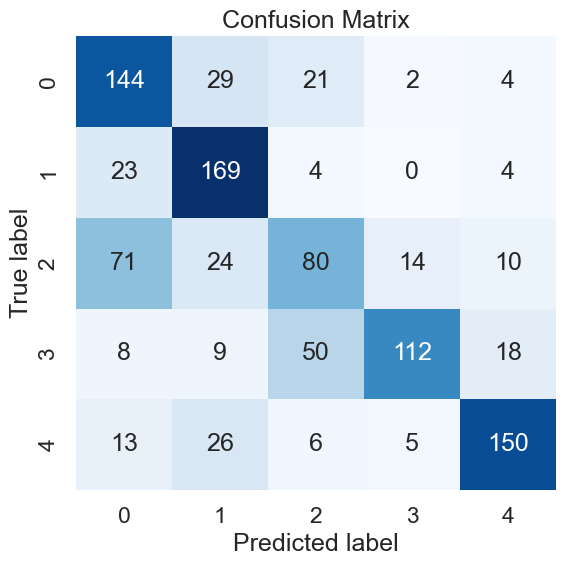

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.72      0.63       200
           1       0.66      0.84      0.74       200
           2       0.50      0.40      0.44       199
           3       0.84      0.57      0.68       197
           4       0.81      0.75      0.78       200

    accuracy                           0.66       996
   macro avg       0.67      0.66      0.65       996
weighted avg       0.67      0.66      0.65       996

Epoch 62/100
--------------------------------------------------
Training Loss: 0.9260, Accuracy: 0.6364
Validation Loss: 0.7966, Accuracy: 0.6978
🗑️ Deleted old model file: model_epoch_54.pth
✅ Best model weights saved to model_epoch_62.pth.
Epoch 63/100
--------------------------------------------------
Training Loss: 0.9248, Accuracy: 0.6430
Validation Loss: 0.8698, Accuracy: 0.6516
Epoch 64/100
--------------------------------------------------
Training Loss: 0.9292, Accuracy: 0.6

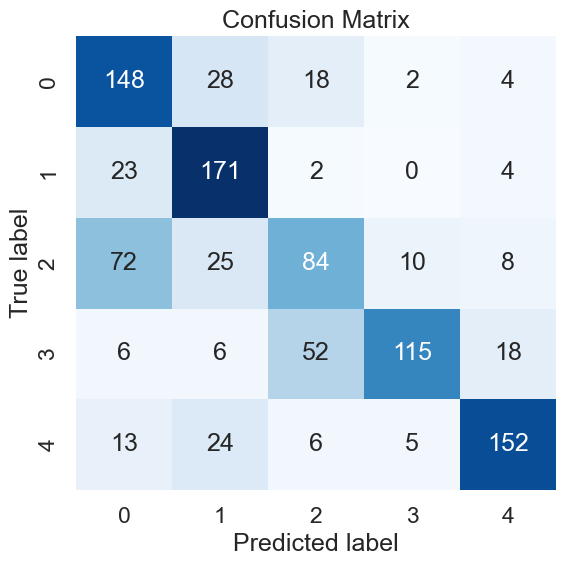

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.74      0.64       200
           1       0.67      0.85      0.75       200
           2       0.52      0.42      0.47       199
           3       0.87      0.58      0.70       197
           4       0.82      0.76      0.79       200

    accuracy                           0.67       996
   macro avg       0.69      0.67      0.67       996
weighted avg       0.69      0.67      0.67       996

Epoch 67/100
--------------------------------------------------
Training Loss: 0.9057, Accuracy: 0.6462
Validation Loss: 0.7624, Accuracy: 0.7149
Epoch 68/100
--------------------------------------------------
Training Loss: 0.9019, Accuracy: 0.6439
Validation Loss: 0.7884, Accuracy: 0.6948
Epoch 69/100
--------------------------------------------------
Training Loss: 0.9129, Accuracy: 0.6393
Validation Loss: 0.7747, Accuracy: 0.7219
Epoch 70/100
-------------------------------------

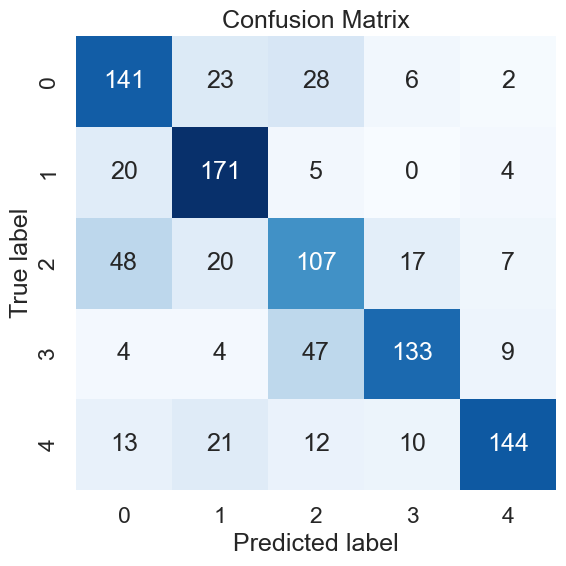

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       200
           1       0.72      0.85      0.78       200
           2       0.54      0.54      0.54       199
           3       0.80      0.68      0.73       197
           4       0.87      0.72      0.79       200

    accuracy                           0.70       996
   macro avg       0.71      0.70      0.70       996
weighted avg       0.71      0.70      0.70       996

Epoch 72/100
--------------------------------------------------
Training Loss: 0.9018, Accuracy: 0.6577
Validation Loss: 0.8027, Accuracy: 0.6888
Epoch 73/100
--------------------------------------------------
Training Loss: 0.8828, Accuracy: 0.6519
Validation Loss: 0.7641, Accuracy: 0.7149
Epoch 74/100
--------------------------------------------------
Training Loss: 0.8978, Accuracy: 0.6534
Validation Loss: 0.7583, Accuracy: 0.7118
Epoch 75/100
-------------------------------------

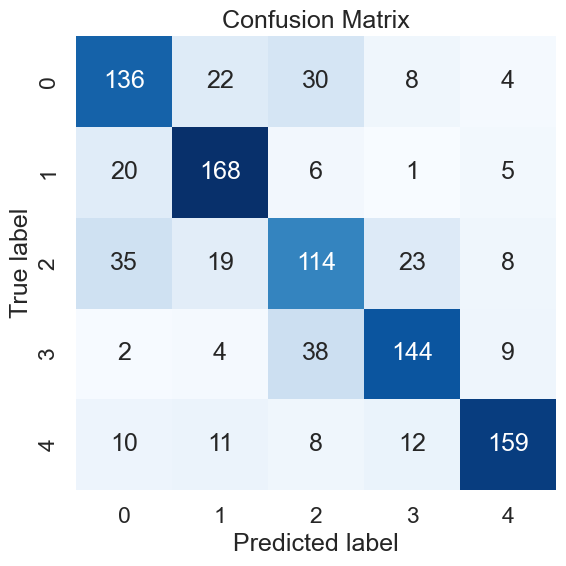

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.67       200
           1       0.75      0.84      0.79       200
           2       0.58      0.57      0.58       199
           3       0.77      0.73      0.75       197
           4       0.86      0.80      0.83       200

    accuracy                           0.72       996
   macro avg       0.73      0.72      0.72       996
weighted avg       0.73      0.72      0.72       996

Epoch 77/100
--------------------------------------------------
Training Loss: 0.9087, Accuracy: 0.6456
Validation Loss: 0.7625, Accuracy: 0.7048
Epoch 78/100
--------------------------------------------------
Training Loss: 0.8598, Accuracy: 0.6671
Validation Loss: 0.7581, Accuracy: 0.7139
Epoch 79/100
--------------------------------------------------
Training Loss: 0.8858, Accuracy: 0.6525
Validation Loss: 0.7475, Accuracy: 0.7269
Epoch 80/100
-------------------------------------

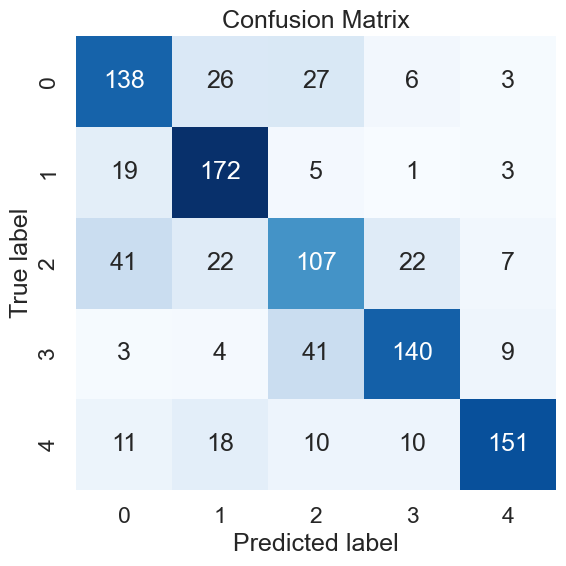

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       200
           1       0.71      0.86      0.78       200
           2       0.56      0.54      0.55       199
           3       0.78      0.71      0.74       197
           4       0.87      0.76      0.81       200

    accuracy                           0.71       996
   macro avg       0.72      0.71      0.71       996
weighted avg       0.72      0.71      0.71       996

Epoch 82/100
--------------------------------------------------
Training Loss: 0.8899, Accuracy: 0.6551
Validation Loss: 0.7594, Accuracy: 0.7129
Epoch 83/100
--------------------------------------------------
Training Loss: 0.8782, Accuracy: 0.6565
Validation Loss: 0.7406, Accuracy: 0.7279
🗑️ Deleted old model file: model_epoch_76.pth
✅ Best model weights saved to model_epoch_83.pth.
Epoch 84/100
--------------------------------------------------
Training Loss: 0.8781, Accuracy: 0.6

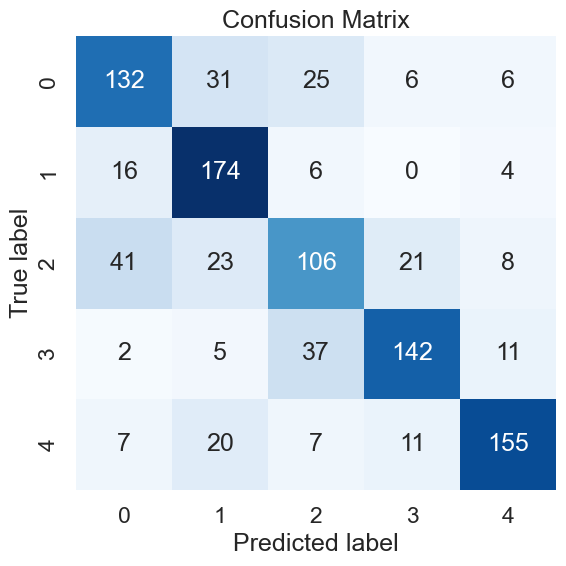

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       200
           1       0.69      0.87      0.77       200
           2       0.59      0.53      0.56       199
           3       0.79      0.72      0.75       197
           4       0.84      0.78      0.81       200

    accuracy                           0.71       996
   macro avg       0.71      0.71      0.71       996
weighted avg       0.71      0.71      0.71       996

Epoch 87/100
--------------------------------------------------
Training Loss: 0.8597, Accuracy: 0.6703
Validation Loss: 0.7484, Accuracy: 0.7179
Epoch 88/100
--------------------------------------------------
Training Loss: 0.8810, Accuracy: 0.6643
Validation Loss: 0.7459, Accuracy: 0.7189
Epoch 89/100
--------------------------------------------------
Training Loss: 0.8716, Accuracy: 0.6623
Validation Loss: 0.7618, Accuracy: 0.7078
Epoch 90/100
-------------------------------------

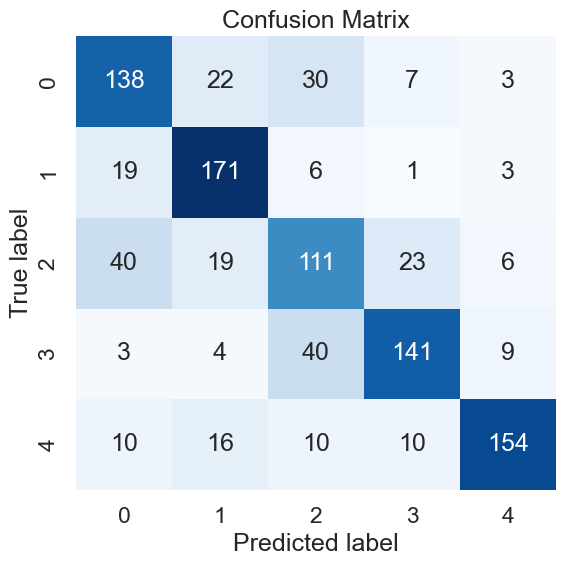

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       200
           1       0.74      0.85      0.79       200
           2       0.56      0.56      0.56       199
           3       0.77      0.72      0.74       197
           4       0.88      0.77      0.82       200

    accuracy                           0.72       996
   macro avg       0.72      0.72      0.72       996
weighted avg       0.72      0.72      0.72       996

Epoch 92/100
--------------------------------------------------
Training Loss: 0.8830, Accuracy: 0.6557
Validation Loss: 0.7481, Accuracy: 0.7169
Epoch 93/100
--------------------------------------------------
Training Loss: 0.8761, Accuracy: 0.6568
Validation Loss: 0.7430, Accuracy: 0.7249
Epoch 94/100
--------------------------------------------------
Training Loss: 0.8881, Accuracy: 0.6554
Validation Loss: 0.7450, Accuracy: 0.7239
Epoch 95/100
-------------------------------------

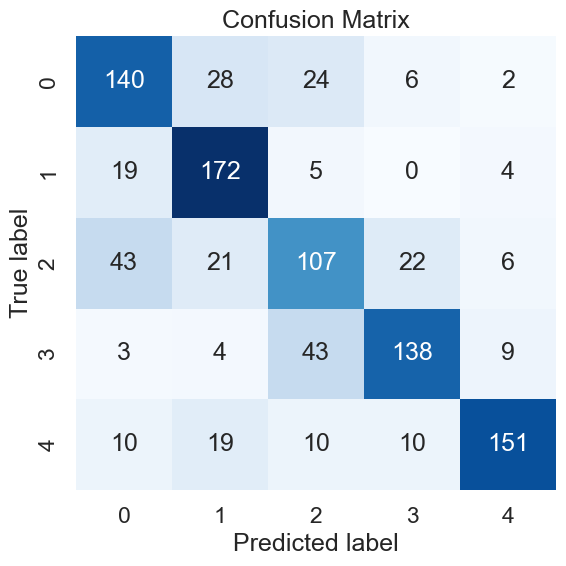

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       200
           1       0.70      0.86      0.77       200
           2       0.57      0.54      0.55       199
           3       0.78      0.70      0.74       197
           4       0.88      0.76      0.81       200

    accuracy                           0.71       996
   macro avg       0.72      0.71      0.71       996
weighted avg       0.72      0.71      0.71       996

Epoch 97/100
--------------------------------------------------
Training Loss: 0.8802, Accuracy: 0.6568
Validation Loss: 0.7600, Accuracy: 0.7139
Epoch 98/100
--------------------------------------------------
Training Loss: 0.8727, Accuracy: 0.6640
Validation Loss: 0.7494, Accuracy: 0.7189
Early stopping triggered after 15 epochs of no improvement.
🚨 Early stopping triggered at epoch 98.
Loading best model weights...


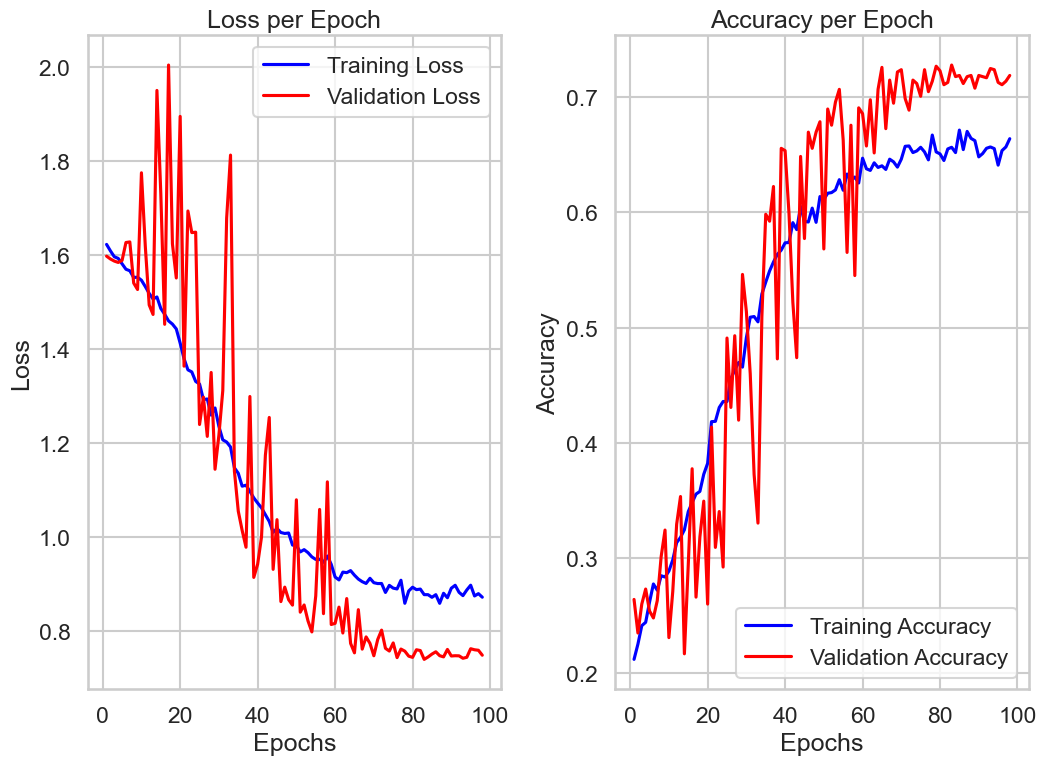

In [90]:
# Example:
early_stopping = EarlyStopping(patience=15, verbose=True, delta=0)
model_name_prefix = "CustomCNN1"  # Or dynamically change this per model
trained_model = train_and_validate(
    model,
    train_loader,
    val_loader,
    optimizer,
    scheduler,
    loss_fn,
    epochs=100,
    device=device,
    early_stopping=early_stopping,
    model_name_prefix=model_name_prefix)



Test Loss: 0.7450, Test Accuracy: 0.7108
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       100
           1       0.78      0.83      0.80       100
           2       0.52      0.49      0.51        99
           3       0.74      0.68      0.71        99
           4       0.82      0.87      0.84       100

    accuracy                           0.71       498
   macro avg       0.71      0.71      0.71       498
weighted avg       0.71      0.71      0.71       498



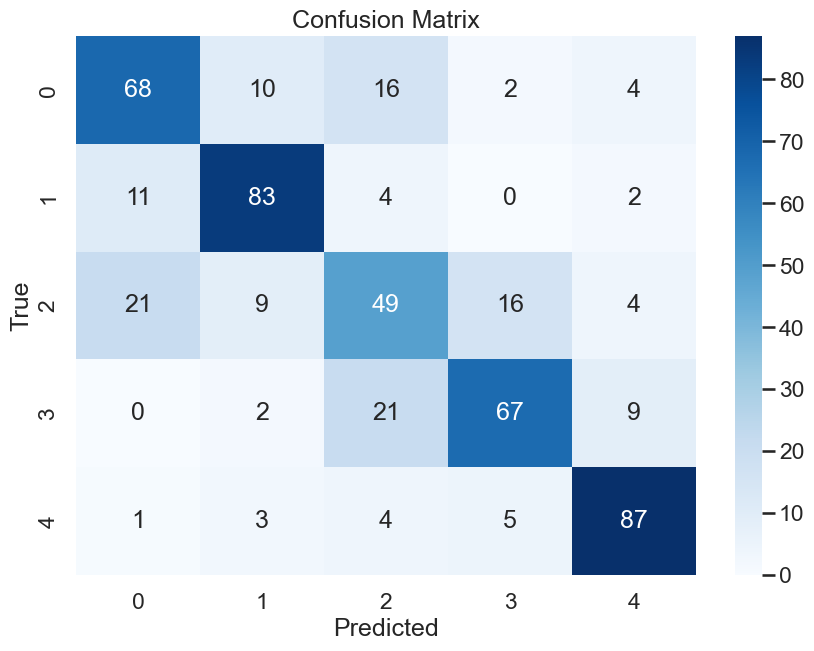

In [91]:
test_model(trained_model, test_loader, loss_fn, device, num_classes=5)